# Finite Automata and Regular Expressions

The course slowly builds up different models of computation of increasing complexity, starting with finite state automata (FSAs).
This chapter introduces FSAs and regular expressions, which turn out to be equivalent in terms of expressiveness.

## Finite State Automata

Finite state automata (FSAs) are an abstraction for a kind of machine with finite memory.
An FSA reads a sequence of symbol and either accepts or rejects it.
We begin by defining finite state automata (FSAs) formally.

```{prf:definition} Finite State Automaton;  FSA
:label: finite-state-automaton

A finite state automaton $M$ is a 5-tuple $(Q, \Sigma, \delta, q_0, F)$ where

- $Q$ is a finite set, whose elements we call the _states_,
- $\Sigma$ is a finite set, whose elements we call the _alphabet symbols_,
- $\delta : Q \times \Sigma \to Q$ is a function called the transition function,
- $q_0 \in Q$ is the start state,
- $F \subseteq Q$ is a set of accept states.
```

```{note}
By its definition, at each state of the FSA there exists precisely one transition for each symbol in the alphabet.
Having two or more transitions with the same symbol is not allowed, and having no transition for a given symbol is also not allowed.
```

In order to get a better idea for what an FSA does, we can draw it in the form of a state diagram.
In a state diagram, we use circles for the states, labeled arrows for the transitions, an arrow to mark the inital state, and double circles to mark the final states.
Below is an example of an FSA, with three states.

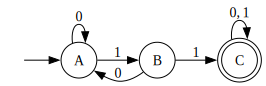

In [52]:
from python_fsa.dfa import DFA
from python_fsa.graph import to_dot
from graphviz import Source

A = "A"
B = "B"
C = "C"

dfa = DFA(
    alphabet=(0, 1),
    states=(A, B, C),
    initial=A,
    transitions={
        (A, 0): A,
        (A, 1): B,
        (B, 0): A,
        (B, 1): C,
        (C, 0): C,
        (C, 1): C,
    },
    final=(C,),
)
Source(to_dot(dfa))

Now we define strings, which are sequences of symbols, and languages, which are sets of strings.

```{prf:definition} Strings and Languages

A string is a finite sequence of symbols from a finite set $\Sigma$.
A language is a (finite or infinite) set of strings.
The empty string $\epsilon$ is the string of length $0$.
The empty language $\emptyset$ is the set of no strings.
```

Now we can formally define what it means for an FSA to accept or reject a string, or to recognise a language.

```{prf:definition} FSA accepts a string / recognises a language

We say that the FSA $M = (Q, \Sigma, \delta, q_0, F)$ accepts the string $w = w_1 w_2\dots w_N$, where $w_n \in \Sigma$ for all $n = 1, \dots, N$, if there is a sequence of states $r_0, r_1, \dots, r_n \in Q$ such that

- $r_0 = q_0$,
- $r_n = \delta(r_{n-1}, r_n)$ for $1 \leq n \leq N$,
- $r_n \in F$.

We say that $M$ recognises the language $L$ if $M$ accepts exactly those strings in $L$.
We write $L(M)$ to denote the language recognised by $M$, that is $L(M)= \{w | M \text{ accepts } w\}$.
We say that $L(M)$ is the language of $M$.
```

Note that the definition above means that there exists an FSA which accepts all strings in the language and rejects all other strings which are not in the language.



```{prf:example}
The FSA $M$ shown above accepts all binary strings which contain $11$ as a substring.
```

Now we come to an important definition, that of regular languages.
We call a language regular if an FSA recognises it.


```{prf:definition} Regular language

We say that a language is regular if there exists an FSA that recognises it.
```

```{prf:example}
The set of all finite strings which have an even number of $1$s is a regular language.
An FSA that recognises this language is shown below.
```

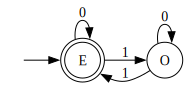

In [55]:
E = "E"
O = "O"

dfa = DFA(
    alphabet=(0, 1),
    states=(E, O),
    initial=E,
    transitions={
        (E, 0): E,
        (E, 1): O,
        (O, 0): O,
        (O, 1): E,
    },
    final=(E,),
)
Source(to_dot(dfa))

````{prf:example}
The set of all finite strings which have an equal number of $0$s and $1$ is not a regular language.


```{dropdown} Proof

Let $A$ be the set of all finite strings with an equal number of $0$s and $1$.
We will show that $L$ is not a regular language by contradiction.
Suppose $A$ is a regular language.
Then there exists an FSA $M = (Q, \Sigma, \delta, q_0, F)$, which recognises it.
Since $Q$ is finite, it contains a finite number of states $S$.
Now, consider the set of strings $B = \{b_0, b_1, \dots, b_{S}\}$, where 

$$ b_s =  \underbrace{0 \dots 0}_{s ~\text{times}}~~\underbrace{1 \dots 1}_{S - s ~\text{times}}$$

Also, define the string $\bar{b}_s$ to be the string $b_s$ with the zeroes and ones swapped, that is

$$\bar{b}_s =  \underbrace{1 \dots 1}_{s ~\text{times}}~~\underbrace{0 \dots 0}_{S - s ~\text{times}}$$

Now, consider feeding each of the strings into $M.$
After reading all the symbols of a given string, $M$ will be in some state in $Q.$
Since there are $S$ states and $S+1$ strings, then by the [pigeonhole principle](https://en.wikipedia.org/wiki/Pigeonhole_principle), there will be two distinct strings, say $b_n$ and $b_m$, which end up in the same state.
Now note that $b_n \bar{b}_n$ contains an equal number of zeroes and ones, so $M$ accepts it.
Further, since $b_n$ and $b_m$ arrive at the same state, $b_m \bar{b}_n$ arrives at the same state as $b_n \bar{b}_n$, so it must be accepted.
But the number of ones minus the number of zeros in $b_n \bar{b}_m$ is $(S - 2n) - (S - 2m) = 2m - 2n$, and since $m \neq n$, it follows that $b_n \bar{b}_m$ does not contain an equal number of zeroes and ones, even though we established that it is accepted.
Contradiction.

This result can also be shown by using the Myhill-Nerode Theorem or the Regular Pumping Lemma.

```

````

As this result suggests, FSAs are very limited in terms of the languages they can recognise and, more generally, are a limited model of computation.

## Regular operations

```{prf:definition} Regular operations

Let $A, B$ be languages.
We define the union, concatenation and star operations as:

- __Union__: $A \cup B = \{w | w \in A \text{ or } w \in B\}.$
- __Concatenation__: $A \circ B = AB = \{xy | x \in A \text{ and } y \in B\}.$
- __Star__: $A^* = \{x_1 \dots x_N | x_n \in A \text{ for } k \geq 0\}.$

Note that the language obtained via the star operation always contains the empty string.
```


```{prf:definition} Regular expressions

Let $\Sigma$ be an alphabet set.
A regular expression on $\Sigma$ is a language, which can be expressed by recursively combining subsets of $\Sigma$, $\emptyset$ and $\{\epsilon\}$ using the regular expressions $\cup, \circ$ and $^*$.
```

```{prf:example} Some regular expressions

Let $\Sigma = \{0, 1\}$.
The following are examples of regular expressions:

- $(0 \cup 1)^* = \Sigma^*$ is the set of all strings over $\Sigma$.
- $\Sigma^*1$ is the set of all strings that end in $1$.
- $\Sigma^*11\Sigma^*$ is the set of all strings that contain $11$.

When writing regular expressions, we may use the shorthand $a$ instead of the singleton set $\{a\}$, as was done in the examples above.
```

## Closure properties

We continue with proving three closure properties of regular languages, namely closure under union, concatenation and star operations.
We will first prove closure under union.

```{prf:theorem} Closure under union
:class: thm-reg-lang-union-closure

If $A_1, A_2$ are regular languages over an alphabet $\Sigma$, so is $A_1 \cup A_2$.
```

```{dropdown} Proof (Closure under union)

If $A_1$ and $A_2$ are regular languages, then there exist FSAs $M_1 = (Q_1, \Sigma, \delta_1, q_1, F_1)$ and $M_2 = (Q_2, \Sigma, \delta_2, q_2, F_2)$ which recognise them, respectively.
Define the FSA $M = (Q, \Sigma, \delta, q, F)$ as follows

- $Q = Q_1 \times Q_2$
- $q_0 = (q_1, q_2)$
- $\delta : Q \times \Sigma \to Q$ where $\delta((q, r), a) = (\delta_1(q, a), \delta_2(r, a))$
- $F = (F_1 \times Q_2) \cup (Q_1 \times F_2)$

Note that, from our definitions of $Q$, $q_0$ and $\delta$, running the FSA $M$ on a string $s$ is equivalent to running $M_1$ and $M_2$ on $s$ in parallel.
In addition, by our definition of $F$, $M$ accepts its input if either $M_1$ or $M_2$ accepts it.
Therefore $L(M) = L(M_1) \cup L(M_2) = A_1 \cup A_2$ is regular.
```

```{prf:lemma} DFA Pumping Lemma
:label: toc-dfa-pumping-lemma

For any DFA $M$, there exists a positive integer $p$ such that for any string $s \in L(M)$, the following properties hold

1. $|y| \geq 1$
2. $s = xyz$, where $xy \leq p$
3. $s = xy^nz \in L(M)$ for all $n \geq 1$
```